/Users/joeyvollert/Desktop/Research_2024/U_Ant_2/UAnt2_binned_101.txt

Parameter Value        Standard Deviation
K         2.495218e+02 2.077899e+02
c         -5.658017e-03 1.614037e-03
p_max     -1.333782e-01 5.129259e-02
theta_r   2.248172e+00 1.448928e-01
theta_s   3.004092e+00 1.760740e-01
wavelen_max6.373400e-01 1.476276e-02
Status message         Optimization terminated successfully
Number of iterations   77
Objective              <symfit.core.objectives.LeastSquares object at 0x144aaadd0>
Minimizer              <symfit.core.minimizers.SLSQP object at 0x144a62cd0>

Goodness of fit qualifiers:
chi_squared            0.19563144041131017
objective_value        0.09781572020565509
r_squared              0.2922357499522047

Constraints:
--------------------
Question: wavelen_max - 0.3 >= 0?
Answer:   0.33734000009043724

Question: 0.9 - wavelen_max >= 0?
Answer:   0.2626599999095628


Direct chi-squared: 0.19563144041131017
Reduced chi-squared: 0.002415202968040866


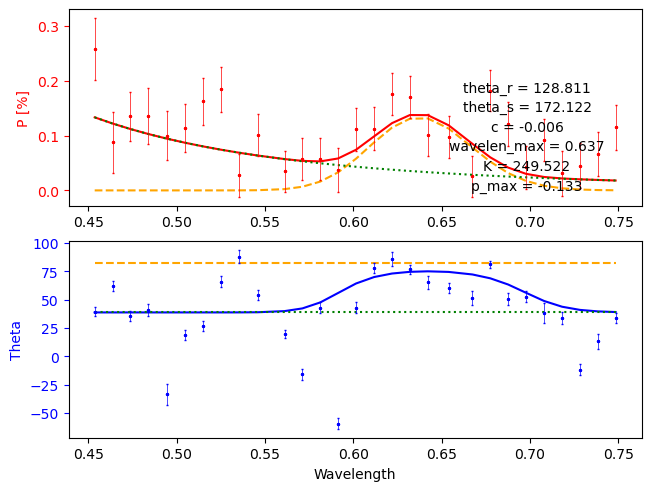

In [44]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy
import sympy as sympy
from symfit import variables, parameters, Fit
from numpy import log as ln
from symfit import exp
from symfit import *
from difflib import SequenceMatcher
import glob
from tabulate import tabulate
from mpmath import radians, degrees
from symfit import pi

# Setting up a function to read in the data and columns
def data_read_in(filename):
    data = np.genfromtxt(filename)
    Col_1 = data[:, 0] * (10 ** (-4))  # conversion from angstroms to microns
    Col_2 = data[:, 1]
    Col_3 = data[:, 2]
    Col_4 = data[:, 3]
    Col_5 = data[:, 4]
    Col_6 = data[:, 5]
    Col_7 = data[:, 6]
    Col_8 = data[:, 7]
    Col_9 = data[:, 8]
    Col_10 = data[:, 9]

    return np.asarray(Col_1), np.asarray(Col_2), np.asarray(Col_3), np.asarray(Col_4), np.asarray(Col_5), np.asarray(Col_6), np.asarray(Col_7), np.asarray(Col_8), np.asarray(Col_9), np.asarray(Col_10)

# Reading in the data file
#directory = '/Users/joeyvollert/Desktop/Research_2024/U_Ant_1/*.txt'
directory = '/Users/joeyvollert/Desktop/Research_2024/U_Ant_2/*.txt'
#directory = '/Users/joeyvollert/Desktop/Research_2024/V_Hya_6/*.txt'
#directory = '/Users/joeyvollert/Desktop/Research_2024/VX_Eri_9/*.txt'
#directory = '/Users/joeyvollert/Desktop/Research_2024/W_Hya_1/*.txt'
#directory = '/Users/joeyvollert/Desktop/Research_2024/W_Hya_4/*.txt'
#directory = '/Users/joeyvollert/Desktop/Research_2024/W_Hya_6/*.txt'
    # Where *.txt represents each file in the directory

for filename in glob.glob(directory):
    filein = filename
    print(filename)

    # Applying the function to read in the columns of the data
    C1, C2, C3, C4, C5, C6, C7, C8, C9, C10 = data_read_in(filein)

    # Defining the data as an array
    C1_data = np.array(C1)  # Wavelength
    C2_data = np.array(C2)  # Intensity
    C3_data = np.array(C3)  # q
    C4_data = np.array(C4)  # u
    C5_data = np.array(C5)  # q error
    C6_data = np.array(C6)  # u error
    C7_data = np.array(C7)  # P
    C8_data = np.array(C8)  # PA
    C9_data = np.array(C9)  # P error
    C10_data = np.array(C10)  # PA error

    # Subtracting 180 deg for position angles > 90 deg
    C8 = [i - 180 if i > 90 else i for i in C8_data]
    C8_data = np.array(C8)

    # Defining the data frame
    df = pd.DataFrame({'C1': C1, 'C2': C2, 'C3': C3, 'C4': C4, 'C5': C5, 'C6': C6, 'C7': C7, 'C8': C8, 'C9': C9, 'C10': C10})

    # Defining parameters and variables
    c, p_max, wavelen_max, K, theta_s, theta_r = parameters('c, p_max, wavelen_max, K, theta_s, theta_r')
    C1, C2, C3, C4, C5, C6, C7, C8, C9, C10 = variables('C1, C2, C3, C4, C5, C6, C7, C8, C9, C10')

    #c = 0
    # p_max.min = 0
    #wavelen_max.min = 0.5
    #wavelen_max.max = 0.6
    # K = 30 #Can change values of K whether its fixed or not fixed

    model_dict = {
        C3: ((p_max * exp(-K * ((ln(wavelen_max / C1)) ** 2)) * sympy.cos(2 * (theta_s))) + c * (C1 ** (-4)) * sympy.cos(2 * (theta_r))),
        C4: ((p_max * exp(-K * ((ln(wavelen_max / C1)) ** 2)) * sympy.sin(2 * (theta_s))) + c * (C1 ** (-4)) * sympy.sin(2 * (theta_r)))
    }

    # Fitting function results NON-WEIGHTED
    fit = Fit(model_dict, C1=C1_data, C3=C3_data, C4=C4_data, constraints=[Ge(wavelen_max, .3000), Le(wavelen_max, .9000)])
    fit_result = fit.execute()
    print(fit_result)

    # Fitting function results WEIGHTED
    #fit = Fit(model_dict, C1=C1_data, C3=C3_data, C4=C4_data, sigma_C3=C5_data, sigma_C4=C6_data, absolute_sigma=True)
    #fit_result = fit.execute()
    #print(fit_result)

    # Combined Serkowski-Rayleigh fitting function for u
    def sr_u(x):
        return (fit_result.value(p_max)) * exp(-(fit_result.value(K)) * ln((fit_result.value(wavelen_max)) / x) ** 2) * sympy.sin(2 * (fit_result.value(theta_s))) + (fit_result.value(c)) * (x ** (-4)) * sympy.sin(2 * (fit_result.value(theta_r)))

    # Combined Serkowski-Rayleigh fitting function for q
    def sr_q(x):
        return (fit_result.value(p_max)) * exp(-(fit_result.value(K)) * ln((fit_result.value(wavelen_max)) / x) ** 2) * sympy.cos(2 * (fit_result.value(theta_s))) + (fit_result.value(c)) * (x ** (-4)) * sympy.cos(2 * (fit_result.value(theta_r)))

    # Serkowski fitting function for u
    def s_u(x):
        return (fit_result.value(p_max)) * exp(-(fit_result.value(K)) * ln((fit_result.value(wavelen_max)) / x) ** 2) * sympy.sin(2 * (fit_result.value(theta_s)))

    # Serkowski fitting function for q
    def s_q(x):
        return (fit_result.value(p_max)) * exp(-(fit_result.value(K)) * ln((fit_result.value(wavelen_max)) / x) ** 2) * sympy.cos(2 * (fit_result.value(theta_s)))

    # Rayleigh fitting function for u
    def r_u(x):
        return (fit_result.value(c)) * (x ** (-4)) * sympy.sin(2 * (fit_result.value(theta_r)))

    # Rayleigh fitting function for q
    def r_q(x):
        return (fit_result.value(c)) * (x ** (-4)) * sympy.cos(2 * (fit_result.value(theta_r)))

    # Converting q & u to polarization
    def pol(x, y):
        return np.sqrt((x ** 2) + (y ** 2))

    # Converting q & u to theta which should be 1/2arctan(u/q)
    def thet(x, y):
        return 0.5 * (np.arctan2(x, y) * (180 / np.pi))

    # Applying functions to wavelength data
    u_1 = df["C1"].apply(lambda x: float(sr_u(x).evalf()))
    q_1 = df["C1"].apply(lambda x: float(sr_q(x).evalf()))
    u_ser = df["C1"].apply(lambda x: float(s_u(x).evalf()))
    q_ser = df["C1"].apply(lambda x: float(s_q(x).evalf()))
    u_ray = df["C1"].apply(lambda x: float(r_u(x).evalf()))
    q_ray = df["C1"].apply(lambda x: float(r_q(x).evalf()))

    # Converting functions to P & Theta space
    p = np.vectorize(pol)
    P = p(u_1, q_1)
    P_data = np.array(P)

    p1 = np.vectorize(pol)
    P1 = p1(u_ser, q_ser)

    p2 = np.vectorize(pol)
    P2 = p2(u_ray, q_ray)

    theta = np.vectorize(thet)
    Theta = theta(u_1, q_1)
    Theta_data = np.array(Theta)

    theta1 = np.vectorize(thet)
    Theta1 = theta1(u_ser, q_ser)

    theta2 = np.vectorize(thet)
    Theta2 = theta2(u_ray, q_ray)

    # Plotting the data

    fig, axs = plt.subplots(2, 1, constrained_layout=True)

    #axs[0].set_title('U_Ant_1_101')
    #axs[0].set_title('U_Ant_2_101')
    #axs[0].set_title('V_Hya_6_101')
    #axs[0].set_title('VX_Eri_9_101')
    #axs[0].set_title('W_Hya_1_101')
    #axs[0].set_title('W_Hya_4_101')
    #axs[0].set_title('W_Hya_6_101')
    
    axs[0].set_ylabel('P [%]', c='red')
    axs[0].scatter(C1_data, C7_data, c='red', s=2)
    axs[0].plot(C1_data, P_data, c='red')
    axs[0].plot(C1_data, P1, c='orange', linestyle='dashed')
    axs[0].plot(C1_data, P2, c='green', linestyle='dotted')
    axs[0].errorbar(C1_data,C7_data, yerr = C9_data, c = 'red', fmt='o', ms = 1.3, ecolor = 'red', elinewidth=0.5, capsize = 1)
    

    axs[1].set_xlabel('Wavelength')
    axs[1].set_ylabel('Theta', c='blue')
    axs[1].scatter(C1_data, C8_data, c='blue', s=2)
    axs[1].plot(C1_data, Theta_data, c='blue')
    axs[1].plot(C1_data, Theta1, c='orange', linestyle='dashed')
    axs[1].plot(C1_data, Theta2, c='green', linestyle='dotted')
    axs[1].errorbar(C1_data,C8_data , yerr = C10_data, c = 'blue', fmt='o', ms = 1.3, ecolor = 'blue', elinewidth=0.5, capsize = 1)

    axs[0].text(.8, .1, 'p_max = ' + str(round(fit_result.value(p_max), 3)), ha='center', va='center', transform=axs[0].transAxes)
    axs[0].text(.8, .2, 'K = ' + str(round(fit_result.value(K), 3)), ha='center', va='center', transform=axs[0].transAxes)
    axs[0].text(.8, .3, 'wavelen_max = ' + str(round(fit_result.value(wavelen_max), 3)), ha='center', va='center', transform=axs[0].transAxes)
    axs[0].text(.8, .4, 'c = ' + str(round(fit_result.value(c), 3)), ha='center', va='center', transform=axs[0].transAxes)
    axs[0].text(.8, .5, 'theta_s = ' + str(round(degrees(fit_result.value(theta_s)), 3)), ha='center', va='center', transform=axs[0].transAxes)
    axs[0].text(.8, .6, 'theta_r = ' + str(round(degrees(fit_result.value(theta_r)), 3)), ha='center', va='center', transform=axs[0].transAxes)

    axs[0].tick_params(axis='y', colors='red')
    axs[1].tick_params(axis='y', colors='blue')
    
    # After fit_result is obtained
    direct_chi_squared = fit_result.chi_squared  # This is the direct chi-squared value

    # Calculate degrees of freedom
    num_data_points = len(C1_data) + len(C3_data) + len(C4_data)  # Total number of data points
    num_fitted_params = len(fit_result.params)  # Number of fitted parameters

    # Calculate reduced chi-squared
    reduced_chi_squared = direct_chi_squared / (num_data_points - num_fitted_params)

    # Print the results
    print(f"Direct chi-squared: {direct_chi_squared}")
    print(f"Reduced chi-squared: {reduced_chi_squared}")
    
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/U_Ant_1/U_Ant_1_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/U_Ant_2/U_Ant_2_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/V_Hya_6/V_Hya_6_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/VX_Eri_9/VX_Eri_9_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/W_Hya_1/W_Hya_1_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/W_Hya_4/W_Hya_4_101.png', dpi = 400)
    #plt.savefig('/Users/joeyvollert/Desktop/Research_2024/W_Hya_6/W_Hya_6_101.png', dpi = 400)

    plt.show()
    
    
   
   

# 